## Distribuciones en forma de anillo

In [1]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

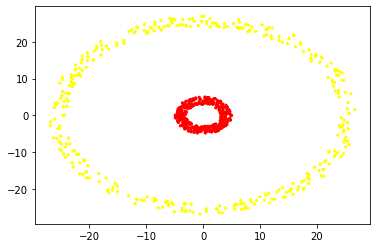

In [3]:

data1 = ring(3, 5)
data2 = ring(24, 27)

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0,len(data1))], [1 for i in range(0,len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = "autumn")

In [4]:
## aplicamos el algoritmos de kmeans
from sklearn.cluster import KMeans

## se pasa el número de cluster y la data
model=KMeans(2).fit(data)

In [5]:
clust=model.predict(data)

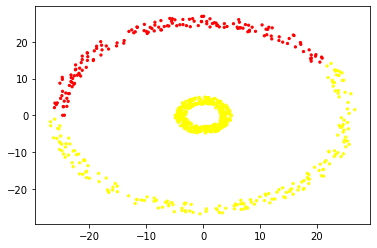

In [6]:
## pintamos los puntos y cada punto con que grupo pertenece
plt.scatter(data[:,0], data[:,1], c=clust, s=5, cmap="autumn")

## Algoritmo de K Medoides

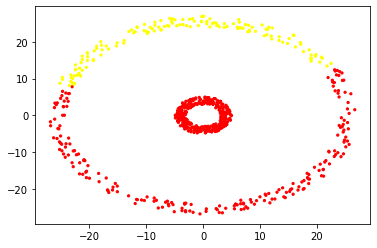

In [7]:
from pyclust import KMedoids
kmed = KMedoids(2).fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=kmed, s=5, cmap="autumn")

## Algoritmo del Clustering Espectral

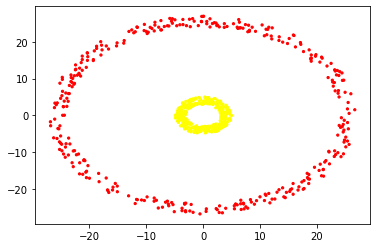

In [8]:
from sklearn.cluster import SpectralClustering
clust = SpectralClustering(2).fit_predict(data)
plt.scatter(data[:,0], data[:,1], c = clust, s = 5, cmap = "autumn")

In [22]:
numero_puntos=500
## creamos 500 puntos de -10 a 10 con una distribucón uniforme
distancias=np.random.uniform(8, 10, numero_puntos)
## angulo aleatorio
angulos=np.random.uniform(0, 2*np.pi, numero_puntos)
puntos=np.array([[distancia*cos(angulo), distancia*sin(angulo)] for angulo, distancia in zip(angulos, distancias)])

In [27]:
def puntos_donas(**diccionario):
    numero_de_puntos=diccionario["numero_de_puntos"]
    distancias=np.random.uniform(diccionario["distancia_min"], diccionario["distancia_max"], numero_de_puntos)
    angulos=np.random.uniform(0, 2*np.pi, numero_de_puntos)
    return np.array([[distancia*cos(angulo), distancia*sin(angulo)] for distancia, angulo in zip(distancias, angulos)])
        

In [57]:
puntos_exterior=puntos_donas(distancia_min=8, distancia_max=10, numero_de_puntos=500)
puntos_interior=puntos_donas(distancia_min=2, distancia_max=4, numero_de_puntos=500)

In [70]:
puntos=np.concatenate([puntos_exterior, puntos_interior], axis=0)
grupos=np.concatenate([np.full(puntos_exterior.shape[0],0), np.full(puntos_exterior.shape[0], 1)])


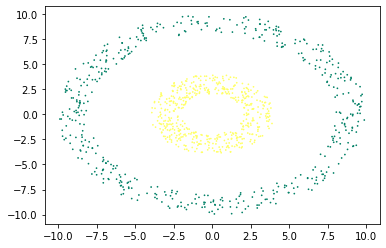

In [73]:
plt.scatter(puntos[:, 0], puntos[:,1], s=.5, c=grupos, cmap="summer")

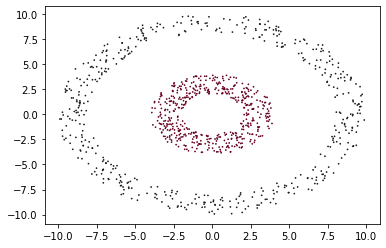

In [82]:
## aplicamos el método para dividir los puntos de acuerdo a un algoritmo
from sklearn.cluster import SpectralClustering
grupos_predichos=SpectralClustering(2).fit_predict(puntos)
plt.scatter(puntos[:,0], puntos[:,1], s=.5, c=grupos_predichos, cmap="RdGy")

In [44]:
puntos_exterior.fill(9)